<a href="https://colab.research.google.com/github/aswaroop99/Wakefield/blob/main/wakefieldNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

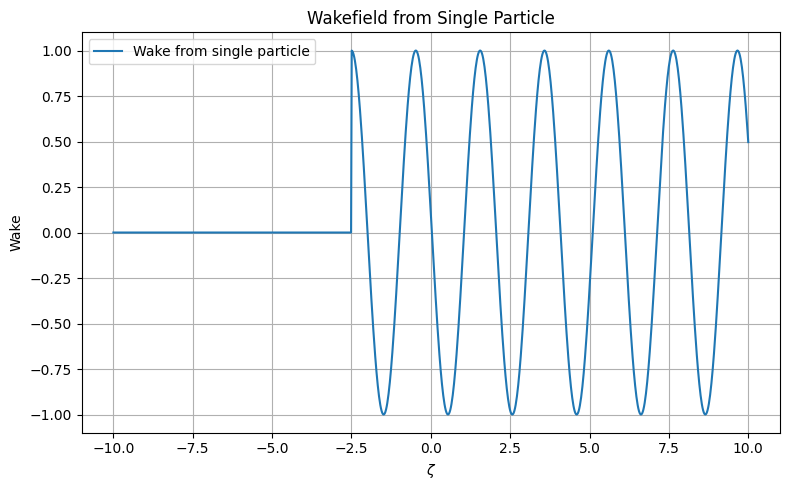

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
W0 = 1.0
k_wake = 3.1

# Grid
zeta_grid = np.linspace(-10, 10, 1000)
zeta_source = -2.5

# Wake function
def wake_function(delta_zeta):
    wake = np.zeros_like(delta_zeta)
    for i in range(len(delta_zeta)):
        if delta_zeta[i] > 0:
            wake[i] = W0 * np.cos(k_wake * delta_zeta[i])
        elif delta_zeta[i] == 0:
            wake[i] = W0 / 2
        else:
            wake[i] = 0.0
    return wake

# Compute Wake
delta = zeta_grid - zeta_source
wake_profile = wake_function(delta)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(zeta_grid, wake_profile, label='Wake from single particle')
#plt.axvline(zeta_source, color='red', linestyle='--', label='Source particle')
plt.title('Wakefield from Single Particle')
plt.xlabel(r'$\zeta$')
plt.ylabel('Wake')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

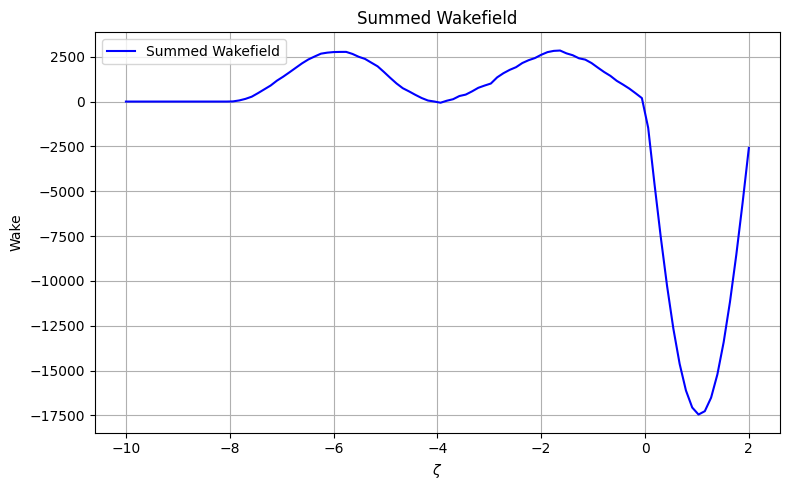

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# PARAMETERS
num_particles = 100000
zeta_min, zeta_max = -8.0, 0.0
W0 = 1.0
k_wake = 1.5 #3.1
charge = 1.0
px_initial = 0.0

def sample_ramp_zeta(n, zeta_min, zeta_max):
    u = np.random.rand(n)
    return zeta_min + (zeta_max - zeta_min) * np.sqrt(u)

def wake_function(delta_zeta):
    wake = np.zeros_like(delta_zeta)
    for i in range(len(delta_zeta)):
        if delta_zeta[i] > 0:
            wake[i] = W0 * np.cos(k_wake * delta_zeta[i])
        elif delta_zeta[i] == 0:
            wake[i] = W0 / 2
        else:
            wake[i] = 0.0
    return wake

def compute_total_wake(zeta):
    N = len(zeta)
    total_wake = np.zeros(N)
    for i in range(N):
        delta = zeta[i] - zeta  # Δζ = ζ_i - ζ_j
        wake_vals = wake_function(delta)
        total_wake[i] = np.sum(wake_vals)
    return total_wake

zeta = sample_ramp_zeta(num_particles, zeta_min, zeta_max)
#zeta.sort()


px0 = np.full(num_particles, px_initial)
'''
#compute wake
total_wake = compute_total_wake(zeta)
px = px0 + charge * total_wake
delta_px = px - px0'''


zeta_eval = np.linspace(zeta_min-2, zeta_max+2, 100)
summed_wake = np.zeros_like(zeta_eval)
for i in range(len(zeta_eval)):
    delta = zeta_eval[i] - zeta            # Δζ to each real particle
    wake_vals = wake_function(delta)
    summed_wake[i] = np.sum(wake_vals)

#plot
plt.figure(figsize=(8, 5))
plt.plot(zeta_eval, summed_wake, label='Summed Wakefield', color='blue')
plt.title('Summed Wakefield')
plt.xlabel(r'$\zeta$')
plt.ylabel('Wake')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

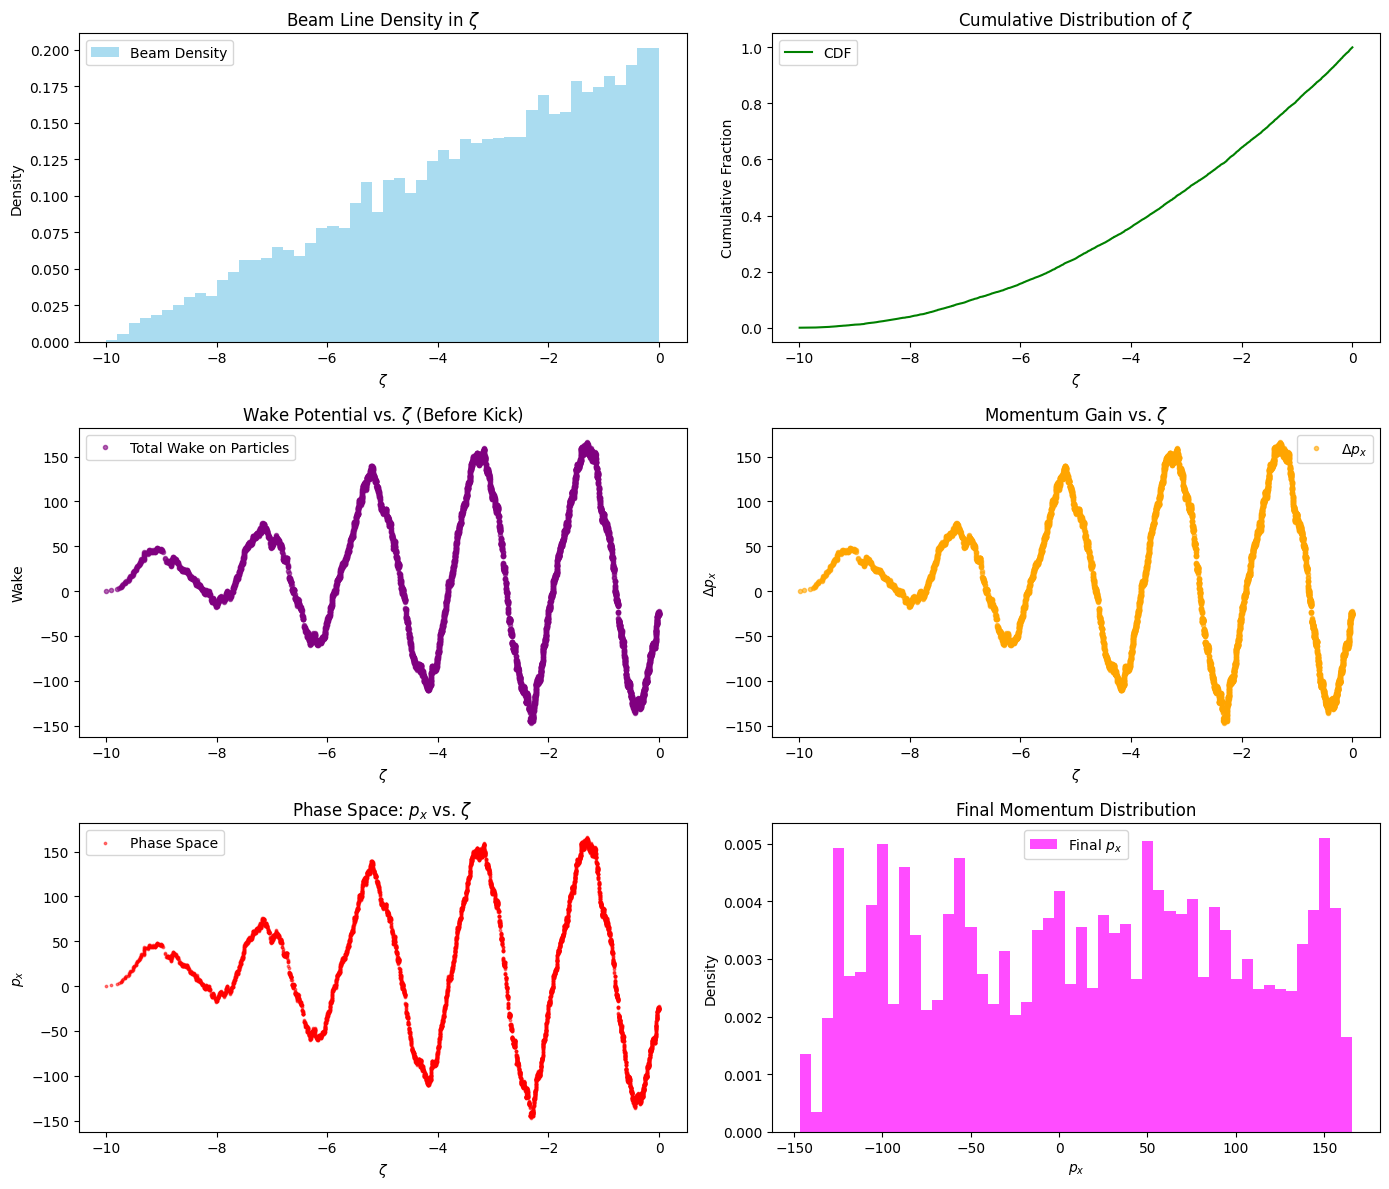

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

#beam desnity
axs[0, 0].hist(zeta, bins=50, density=True, alpha=0.7, color='skyblue', label='Beam Density')
axs[0, 0].set_title('Beam Line Density in $\\zeta$')
axs[0, 0].set_xlabel(r'$\zeta$')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend()

#cumulative distribution
axs[0, 1].plot(np.sort(zeta), np.linspace(0, 1, num_particles), color='green', label='CDF')
axs[0, 1].set_title('Cumulative Distribution of $\\zeta$')
axs[0, 1].set_xlabel(r'$\zeta$')
axs[0, 1].set_ylabel('Cumulative Fraction')
axs[0, 1].legend()

#per particle wake
axs[1, 0].plot(zeta, total_wake, '.', alpha=0.6, color='purple', label='Total Wake on Particles')
axs[1, 0].set_title('Wake Potential vs. $\\zeta$ (Before Kick)')
axs[1, 0].set_xlabel(r'$\zeta$')
axs[1, 0].set_ylabel('Wake')
axs[1, 0].legend()

#momentum gain
axs[1, 1].plot(zeta, delta_px, '.', alpha=0.6, color='orange', label='Δ$p_x$')
axs[1, 1].set_title('Momentum Gain vs. $\\zeta$')
axs[1, 1].set_xlabel(r'$\zeta$')
axs[1, 1].set_ylabel(r'$\Delta p_x$')
axs[1, 1].legend()

#phase space
axs[2, 0].scatter(zeta, px, s=3, alpha=0.5, color='red', label='Phase Space')
axs[2, 0].set_title('Phase Space: $p_x$ vs. $\\zeta$')
axs[2, 0].set_xlabel(r'$\zeta$')
axs[2, 0].set_ylabel(r'$p_x$')
axs[2, 0].legend()

#final momentum
axs[2, 1].hist(px, bins=50, density=True, alpha=0.7, color='magenta', label='Final $p_x$')
axs[2, 1].set_title('Final Momentum Distribution')
axs[2, 1].set_xlabel(r'$p_x$')
axs[2, 1].set_ylabel('Density')
axs[2, 1].legend()

plt.tight_layout()
plt.show()

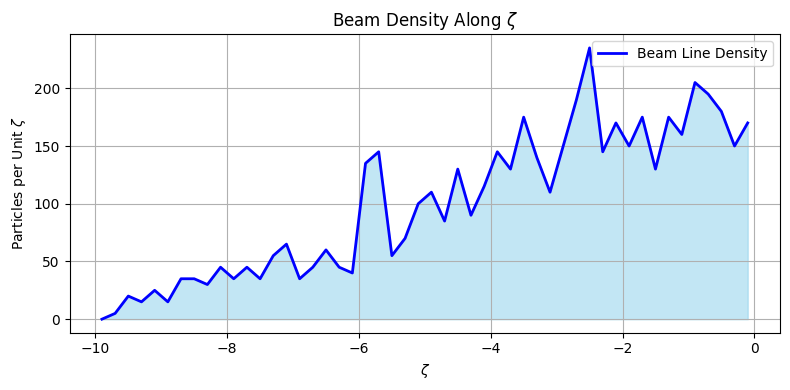

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you already have a 1D numpy array `zeta` of particle positions along ζ
# and know the range (zeta_min, zeta_max) over which you want to compute the density.

# Example:
# zeta_min, zeta_max = -10.0, 0.0
# zeta = sample_ramp_zeta(num_particles, zeta_min, zeta_max)
# zeta.sort()

#
bin_size = 20
nbins = 50

counts, edges = np.histogram(zeta, bins=nbins, range=(zeta_min, zeta_max))

bin_width = edges[1] - edges[0]
density = counts / bin_width  # particles per unit ζ

# 4) Compute the bin centers for plotting
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# 5) Plot the density vs. ζ
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, density, '-', lw=2, color='blue', label='Beam Line Density')
plt.fill_between(bin_centers, density, color='skyblue', alpha=0.5)
plt.title('Beam Density Along $\\zeta$')
plt.xlabel(r'$\zeta$')
plt.ylabel(r'Particles per Unit $\zeta$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
